# DSP Homework 4, matriculation number: 11143654
Generated on: 22.01.2021 at: 15:39:20 h.
### Please execute the next code cells to start your lab/homework!

In [1]:
# iPython magic command to load the matplotlib library and
# select the notebook graphics frontend
%matplotlib inline
# import necessary functions from the thkdss library
from thkdsp import *
from dsplab import *
# import audio related functions from the audio submodule
from thkdsp.audio import play_signal, wav2dtsignal
# import some definitions and functions from numpy, the python library for Matlab-like array processing
from numpy import arange, shape, array, zeros, size, ones, isscalar

In [2]:
# set font for Matplotlib to 'Times New Roman' if that is available
set_mpl_font()
# set default font size for Matplotlib, change to different value if labels are too large or too small
set_mpl_fontsize(16)

In [3]:
# start homework
dsp_hw4_start()

TH Köln University of Applied Sciences
Course:  Digital Signal Processing
Homework 4
 
You are about to start Homework 4 !
Please read and follow the instructions exactly as stated!
 
You will be asked to enter your matriculation number.
Please make sure that you enter it correctly!
 
Please enter your 8-digit matriculation number: 11143654
Your matriculation number is:  11143654
Is this correct? yes/no: yes
Starting output to log file for Homework 4 for matriculation number: 11143654
dsp_hw4_11143654.log
Activating auto-logging. Current session state plus future input saved.
Filename       : dsp_hw4_11143654.log
Mode           : append
Output logging : True
Raw input log  : True
Timestamping   : True
State          : active
Info: 5400436791
Homework 4 for matriculation number 11143654 started at: 2021-01-22 15:40:48.324437


### Enter as many code cells as you need below!
### Note: Your notebook needs to be modular enough, i.e. it has to consist of enough code cells!
### Otherwise, your submission will be considered as not sufficient!


In [4]:
import numpy as np
from thkdsp.ztransform import *
from matplotlib import *
from thkdsp import * 
from thkdsp.ztransform import residue, residuez, zplane
from numpy import poly, array
from scipy.signal import lfilter

In [5]:
set_mpl_font()
set_mpl_fontsize(16)

# Solution to 5.8c

In [6]:

#The zeros of the system function from the question are given as:

z_n1 = 1j

z_n2 = -1j

#While the poles are also given as: 

z_p1 = -1/2 + 1/2j

z_p2 = -1/2 - 1/2j

From the recorded tutorial, poly funtion is only needed to be called to obtain the coefficient
array of a polynomial only if the zeros or the roots are given and in this case, 
they're given, hence we have:

In [7]:
#For the numerator polynomial where 5/4 is the constant as given in the solution

b = 5/4 * np.poly([z_n1, z_n2]) 


In [8]:
#for the denumerator ploynomial

a = np.poly([z_p1, z_p2])

print(b)
print(a)

[1.25 0.   1.25]
[1.  1.  0.5]


In [9]:
#Entering the numerator coefficient directly and converting b_step into a numpy array internally
b_step = array([1.25, 0])

a_step = poly([z_p1, z_p2])

print(b_step)

#print(a_step)
#No reason to print (a) because the result will be simliar to what we already have above since the denorminator does not differs

[1.25 0.  ]


Getting the  coefficients (r), poles(p) and the constants (c),

In [10]:
r, p, c = residue(b_step, a_step)

print(r) #residues

print(p) #poles

print(c) #constant 

[0.625+0.625j 0.625-0.625j]
[-0.5+0.5j -0.5-0.5j]
[0.]


In [11]:
#Given the range –5 <= n <= 20 from Ilias and the input signal s_n= np.sin((2*np.pi*n)/4)*step(n)

nmin = -5

nmax = 20

n = lrange(nmin, nmax)

s_n= np.sin((2*np.pi*n)/4)*step(n)

h_n = c*delta(n)

print (h_n)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Text(0.5, 0.98, 'Problem 5.8c : Output signal')

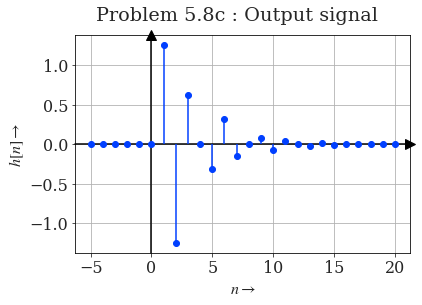

In [12]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))
    
h_n=np.real(h_n)

fig, ax = plot_signal(n, h_n, xlabel="n", ylabel=r"h")

fig.suptitle(r"Problem 5.8c : Output signal")


Text(0.5, 0.98, 'Problem 5.8c filtered output')

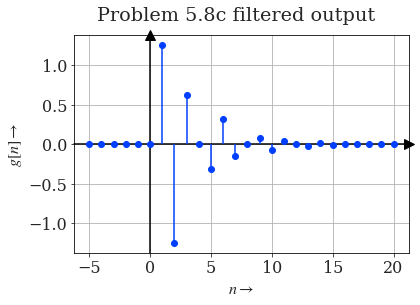

In [13]:
#Computing the step response via lfilter funtion

g_n = lfilter(b, a, s_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"g")

fig.suptitle(r"Problem 5.8c filtered output")

In [14]:
print(h_n)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.25000000e+00 -1.25000000e+00
  6.25000000e-01  1.11022302e-16 -3.12500000e-01  3.12500000e-01
 -1.56250000e-01 -6.93889390e-17  7.81250000e-02 -7.81250000e-02
  3.90625000e-02  2.42861287e-17 -1.95312500e-02  1.95312500e-02
 -9.76562500e-03 -8.67361738e-18  4.88281250e-03 -4.88281250e-03
  2.44140625e-03  2.60208521e-18]


In [15]:
print(g_n)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.25000000e+00 -1.25000000e+00
  6.25000000e-01 -8.41170949e-17 -3.12500000e-01  3.12500000e-01
 -1.56250000e-01 -1.70073603e-18  7.81250000e-02 -7.81250000e-02
  3.90625000e-02 -9.48999795e-18 -1.95312500e-02  1.95312500e-02
 -9.76562500e-03 -1.03403660e-17  4.88281250e-03 -4.88281250e-03
  2.44140625e-03 -9.88969137e-18]


# Solution to problem 5.9

[ 0.25 -0.5   0.25]
[1 0 0]
[0.5 1.  0.5]
[ 1.  -0.9  0. ]


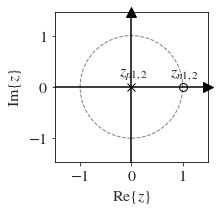

In [16]:
#Coeficients gotten from the exercise

b = array([0.25, -0.5, 0.25])
a = array([1, 0, 0])

b_step = array([0.5, 1, 0.5])
a_step = array([1, -0.9, 0]) 


#Doing the Pole-zero plot
zplane(b, a)

print(b)
print(a)

print(b_step)
print(a_step)

In [17]:
r, p, c = residue(b_step, a_step)

print(r) #residues

print(p) #poles

print(c) #constant 

[ 2.00555556 -0.55555556]
[0.9 0. ]
[0.5]


In [18]:
#Given the range –5 <= n <= 20 from Ilias

nmin = -5

nmax = 20

n = lrange(nmin, nmax)

h_n = c*delta(n)

print (h_n)

[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0. ]


[       nan        nan        nan        nan        nan        nan
 1.45       1.805      1.6245     1.46205    1.315845   1.1842605
 1.06583445 0.95925101 0.8633259  0.77699331 0.69929398 0.62936458
 0.56642813 0.50978531 0.45880678 0.4129261  0.37163349 0.33447014
 0.30102313 0.27092082]


<ipython-input-19-ea69cb50b328>:2: RuntimeWarning: divide by zero encountered in power
  h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))
<ipython-input-19-ea69cb50b328>:2: RuntimeWarning: invalid value encountered in multiply
  h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))


Text(0.5, 0.98, 'Problem 5.9a : Output signal')

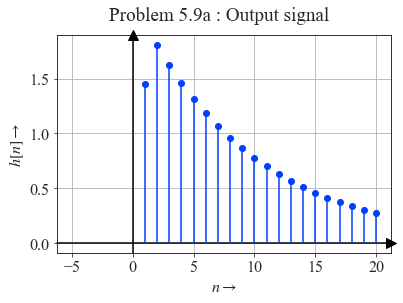

In [19]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))
    
h_n=np.real(h_n)
print(h_n)

fig, ax = plot_signal(n, h_n, xlabel="n", ylabel=r"h")

fig.suptitle(r"Problem 5.9a : Output signal")


[ 0.          0.          0.          0.          0.          0.5
 -0.55        0.005       0.0045      0.00405     0.003645    0.0032805
  0.00295245  0.0026572   0.00239148  0.00215234  0.0019371   0.00174339
  0.00156905  0.00141215  0.00127093  0.00114384  0.00102946  0.00092651
  0.00083386  0.00075047]


Text(0.5, 0.98, 'Problem 5.9a filtered output signal')

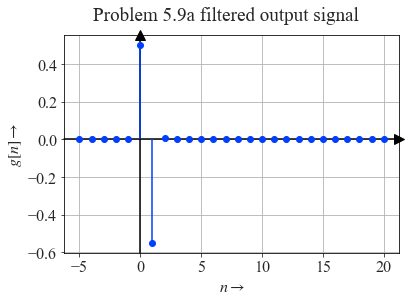

In [21]:
#Computing the step response via lfilter funtion

#input signal
s_n = (2*(0.9)**n)*step(n)

g_n = lfilter(b, a, s_n)
print(g_n)

fig, ax = plot_signal(n, g_n, xlabel="n", ylabel=r"g")
fig.suptitle(r"Problem 5.9a filtered output signal")



# Solution to 5.9b

[ 1.  -0.5  0. ]
[ 1.    0.5  -0.25]
[ 2 -1  0  0]
[ 1.    -0.4   -0.7    0.225]


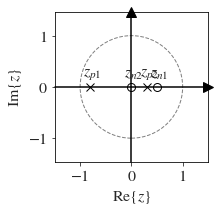

In [22]:
#coefficient arrays from the exercise

b = array([1, -0.5, 0])
a = array([ 1, 0.5, -0.25])
b_step = array([2, -1, 0, 0])
a_step = array([1, -0.4, -0.7, 0.225]) 

#Pole-zero plot
zplane(b, a)

print(b)
print(a)

print(b_step)
print(a_step)


In [23]:
r, p, c = residue(b_step, a_step)

print(r)

print(p)

print(c)

[-0.89678675  0.64158416  0.05520259]
[-0.80901699  0.9         0.30901699]
[2.]


In [24]:
nmin = -5

nmax = 20

n = lrange(nmin, nmax)

h_n=c*delta(n)

print (h_n)

[0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


[ 0.          0.          0.          0.          0.          2.
 -0.2         1.32       -0.062       0.9442      0.03728     0.689802
  0.0895718   0.51030212  0.11161566  0.38170409  0.11599462  0.28847719
  0.11070369  0.22011672  0.1006319   0.16942613  0.08868652  0.13143073
  0.07653198  0.10265983]


Text(0.5, 0.98, 'Problem 5.9b output signal')

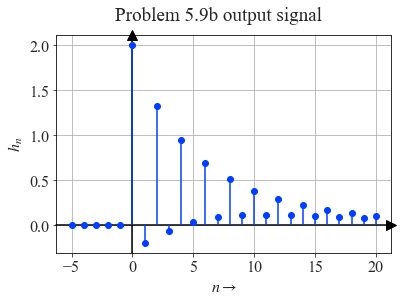

In [25]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))

h_n = np.real(h_n)
print(h_n)
    
fig, ax = plot_signal(n, h_n, xlabel='n', ylabel=r'$h_n$')
fig.suptitle(r'Problem 5.9b output signal')

[ 0.          0.          0.          0.          0.          2.
 -0.2         1.32       -0.062       0.9442      0.03728     0.689802
  0.0895718   0.51030212  0.11161566  0.38170409  0.11599462  0.28847719
  0.11070369  0.22011672  0.1006319   0.16942613  0.08868652  0.13143073
  0.07653198  0.10265983]


Text(0.5, 0.98, 'Problem 5.9b filtered output signal')

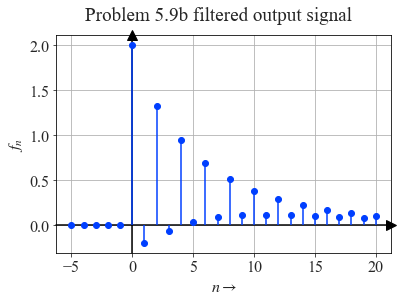

In [26]:
s_n = (2*(0.9)**n)*step(n) #input signal

#Filtered output signal
g_n = lfilter(b, a, s_n)

print(g_n)

#Ploting of the filtered output signal
fig, ax = plot_signal(n, g_n, xlabel='n', ylabel=r'$f_n$')
fig.suptitle(r'Problem 5.9b filtered output signal') 

# Solution to question 5.9c

[2 0]
[1.  0.5]
[4 0 0]
[1.   1.4  0.45]


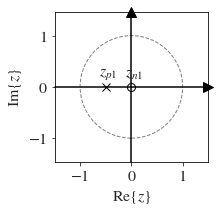

In [27]:
#coefficient arrays from the exercise

b = array([2, 0])
a = array([ 1, 0.5])

b_step = array([4, 0, 0])
a_step = array([1, 1.4, 0.45]) 


#Pole-zero plot
zplane(b, a)

print(b)
print(a)

print(b_step)
print(a_step)


In [28]:
r, p, c = residue(b_step, a_step)

print(r)

print(p)

print(c)

[-8.1  2.5]
[-0.9 -0.5]
[4.]


In [29]:
nmin = -5
nmax = 20
n = lrange(nmin, nmax)
h_n=c*delta(n)
print (h_n)

[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


[ 0.          0.          0.          0.          0.          4.
 -5.6         6.04       -5.936       5.5924     -5.15816     4.704844
 -4.2656096   3.85467364 -3.47701878  3.13322315 -2.82185396  2.54064513
 -2.28706889  2.05860615 -1.8528676   1.66764188 -1.50090821  1.35083264
 -1.21575701  1.09418512]


Text(0.5, 0.98, 'Problem 5.9c output signal')

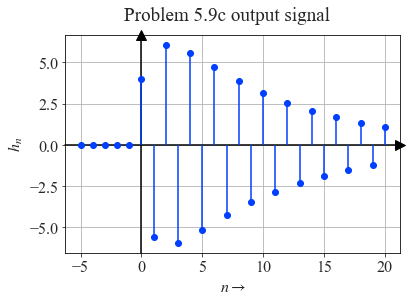

In [30]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))

h_n = np.real(h_n)
print(h_n)
    
fig, ax = plot_signal(n, h_n, xlabel='n', ylabel=r'$h_n$')
fig.suptitle(r'Problem 5.9c output signal')

Text(0.5, 0.98, 'Problem 5.9c filtered output signal')

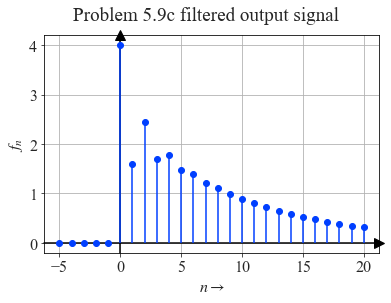

In [31]:
#input signal
s_n = (2*(0.9)**n)*step(n) 

#Filter output signal
g_n = lfilter(b, a, s_n)

#Ploting filtered output signal
fig, ax = plot_signal(n, g_n, xlabel='n', ylabel=r'$f_n$')
fig.suptitle(r'Problem 5.9c filtered output signal') 

# Solving Problem 5.9d

[ 1.2  0.6 -1. ]
[ 1.   -0.4  -0.45]


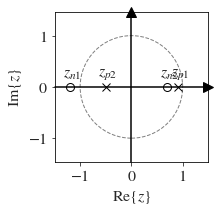

In [33]:
 #coefficient arrays from the exercise
    
b = array([1.2, 0.6, -1])    
a = array([1, -0.4, -0.45])
                  


#Pole-zero plot
zplane(b, a)

print(b)
print(a)


In [34]:
r, p, c = residue(b, a)
print(r)
print(p)
print(c)

[0.36571429 0.71428571]
[ 0.9 -0.5]
[1.2]


In [35]:
nmin = -5

nmax = 20

n = lrange(nmin, nmax)

h_n=c*delta(n)

print (h_n)

[0.  0.  0.  0.  0.  1.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0. ]


[ 0.          0.          0.          0.          0.          1.2
  1.08       -0.028       0.4748      0.17732     0.284588    0.1936292
  0.20551628  0.16933965  0.16021819  0.14029012  0.12821423  0.11441625
  0.1034629   0.09287247  0.08370729  0.07527553  0.06777849  0.06098539
  0.05489448  0.04940121]


Text(0.5, 0.98, 'Problem 5.9d : Output signal')

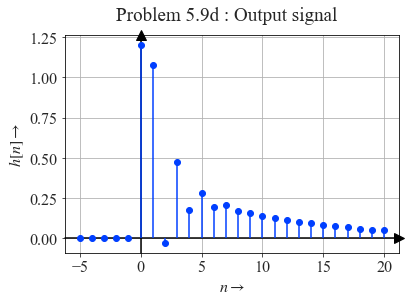

In [36]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))
    
h_n=np.real(h_n)
print(h_n)

fig, ax = plot_signal(n, h_n, xlabel="n", ylabel=r"h")

fig.suptitle(r"Problem 5.9d : Output signal")


[0.         0.         0.         0.         0.         2.4
 4.32       3.832      4.3984     4.3132     4.451056   4.3932088
 4.36492048 4.26710774 4.16083334 4.02533024 3.87922568 3.7201356
 3.55504785 3.385288   3.21417379 3.04330747 2.87453372 2.70905112
 2.54793496 2.39194389]


Text(0.5, 0.98, 'Problem 5.9d filtered output signal')

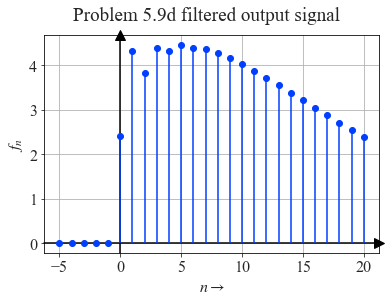

In [37]:
#input signal
s_n = (2*(0.9)**n)*step(n) 

#Filter output signal
g_n = lfilter(b, a, s_n)
print(g_n)

#Ploting filtered output signal
fig, ax = plot_signal(n, g_n, xlabel='n', ylabel=r'$f_n$')
fig.suptitle(r'Problem 5.9d filtered output signal')   

# Solution to Question 5.9e

[1.         1.33333333 1.77777778 2.37037037 3.16049383]
[1.         0.75       0.5625     0.421875   0.31640625]


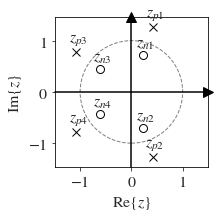

In [38]:
#coefficient arrays from the exercise

b = array([1, 0.75, 0.5625, 0.421875, 0.31640625])

a = array([1, 1.33333333, 1.77777778, 2.37037037, 3.16049383])

#Pole-zero plot

zplane(b, a)

print(a)

print(b)

In [39]:
r, p, c = residue(b, a)

print(r)

print(p)

print(c)

[-0.01612847+0.30013069j -0.01612847-0.30013069j -0.27553819+0.1642647j
 -0.27553819-0.1642647j ]
[ 0.41202266+1.26807536j  0.41202266-1.26807536j -1.07868932+0.78371367j
 -1.07868932-0.78371367j]
[1.]


In [40]:
nmin = -5

nmax = 20

n = lrange(nmin, nmax)

h_n=c*delta(n)

print (h_n)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00 -5.83333330e-01 -4.37500009e-01
 -3.28124994e-01 -2.46093753e-01  3.79211678e+00 -2.45816184e+00
 -1.84362147e+00 -1.38271600e+00 -1.03703707e+00  1.59799489e+01
 -1.03586737e+01 -7.76900585e+00 -5.82675376e+00 -4.37006572e+00
  6.73393732e+01 -4.36513655e+01 -3.27385273e+01 -2.45538920e+01
 -1.84154212e+01  2.83767565e+02]


Text(0.5, 0.98, 'Problem 5.9e : output signal')

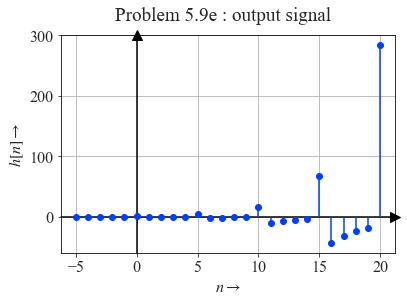

In [41]:
for k in range(0, len(p)):
    h_n = h_n + step(n-1)*(r[k]*p[k]**(n-1))
    
h_n=np.real(h_n)
print(h_n)
fig, ax = plot_signal(n, h_n, xlabel="n", ylabel=r"h")

fig.suptitle(r"Problem 5.9e : output signal")

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00000000e+00  6.33333340e-01 -3.05000011e-01
 -9.30749999e-01 -1.32986251e+00  6.38735730e+00  8.32297888e-01
 -2.93817484e+00 -5.40978936e+00 -6.94288456e+00  2.57113017e+01
  2.42282412e+00 -1.33574700e+01 -2.36752305e+01 -3.00478389e+01
  1.07635691e+02  9.56939130e+00 -5.68646025e+01 -1.00285926e+02
 -1.27088176e+02  4.53155772e+02]


Text(0.5, 0.98, 'Problem 5.9e filtered output signal')

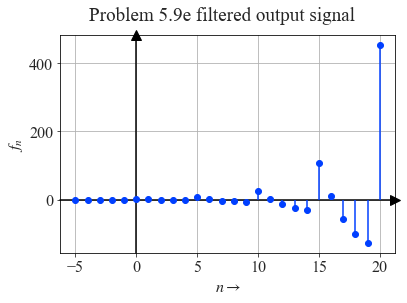

In [42]:
s_n = (2*(0.9)**n)*step(n) #input signal

#Filter output signal
g_n = lfilter(b, a, s_n)

print(g_n)

#Ploting filtered output signal
fig, ax = plot_signal(n, g_n, xlabel='n', ylabel=r'$f_n$')
fig.suptitle(r'Problem 5.9e filtered output signal') 

### When you run the command in the next code cell, the lab/homework will be finished!
### Execute the next code cell only if you really want to finish this lab/homework!
### This code cell should be your last code cell!


In [43]:
# finish homework
dsp_hw4_finish()

You are about to finish Homework 4 !
This will finish output to the log file, such that you should not enter any command after finishing!

Thus, proceed only if you are sure that you are really finished!!
Do you really want to finish? yes/no: 11143654
Please enter "yes" or "no"!
Do you really want to finish? yes/no: yes
Finishing Homework 4 for matriculation number 11143654
Homework 4  finished at: 2021-01-22 16:29:39.882985
Finished after: 0:48:51.564927
Info:  5400436791
Congratulations! You have just finished Homework 4 !
 
In your current working directory you will find the following Log file:
 
Log file:  dsp_hw4_11143654.log
 
Please save this iPython notebook one more time!
 
Please upload both files to the ILIAS server:
If this is a homework, use the 'Homework' folder of the ILIAS DSP internet pages!
If this is a lab, use the 'Lab' folder of the ILIAS DSP internet pages!
 
In either case you will be notified on the status of your submission via email.

So stay tuned!
Harald Eld

### Please save this notebook one more time!